In [33]:
from pulp import LpMaximize, LpMinimize, LpInteger, LpProblem, LpVariable, lpDot, LpStatus, lpSum

In [49]:
names = ['mleko','jablko','ryze', 'banany','chleba', 'maslo','gouda','kureci','vajicka','pivo','burt']
upbound = {
            'mleko':10,
            'jablko':10,
            'ryze':10,
            'banany':10,
            'chleba':10,
            'maslo':10,
            'gouda':10,
            'kureci':10,
            'vajicka':10,
            'pivo':10,
            'burt':10
            }

energie_vec = [260,218,1447,394,244,3134,1337,442,632,175,1313]
bilkoviny_vec = [3,0,3,1.2,8,0.7,25,23,13,0.5,10]
sacharidy_vec = [4,17,28,25,45,0.8,0.5,0,1.2,3,2.8]
tuky_vec = [3.5,0,0.2,30,3.2,18,27,31,10,0.22,30]
c_vec = [3,5,4,4,4.4,24,17,12,10,8,10]

In [50]:
model = LpProblem(name="jidelnicek",sense=LpMinimize)
vars = [LpVariable(name=i,lowBound=0,upBound=upbound[i]) for i in names]

In [51]:
model += lpDot(c_vec,vars)
model += (lpDot(energie_vec,vars)>=8000, 'dolni mez energie')
model += (lpDot(energie_vec,vars)<=12000, 'horni mez energie')
model += (lpDot(bilkoviny_vec,vars)>=72, 'dolni mez bilkovin')
model += (lpDot(bilkoviny_vec,vars)<=140, 'horni mez bilkovin')
model += (lpDot(sacharidy_vec,vars)>=200, 'dolni mez sacharidu')
model += (lpDot(sacharidy_vec,vars)<=400, 'horni mez sacharidu')
model += (lpDot(tuky_vec,vars)>=50, 'dolni mez tuku')
model += (lpDot(tuky_vec,vars)<=80, 'horni mez tuku')

In [52]:
result = model.solve()
print(f"Hotovo {result}")
print(f"Závěr: {model.status}, {LpStatus[model.status]}")
print(f"Optimum: {model.objective.value()}")
for var in model.variables():
  print(f"{var.name}: {var.value()}")
for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

Hotovo 1
Závěr: 1, Optimal
Optimum: 49.26496104
banany: 0.0
burt: 0.0
chleba: 1.5437016
gouda: 0.0
jablko: 0.0
kureci: 1.9854201
maslo: 0.0
mleko: 0.0
pivo: 0.0
ryze: 4.6619082
vajicka: 0.0
dolni_mez_energie: 3.999999967163603e-05
horni_mez_energie: -3999.9999600000006
dolni_mez_bilkovin: -2.9999999640040187e-07
horni_mez_bilkovin: -68.0000003
dolni_mez_sacharidu: 1.6000000044869012e-06
horni_mez_sacharidu: -199.99999840000004
dolni_mez_tuku: 17.420249860000006
horni_mez_tuku: -12.579750139999994


In [58]:
for name, constraint in list(model.constraints.items()):
  print(f"Omezení:{name}\tDuální proměnná:{constraint.pi}")

Omezení:dolni_mez_energie	Duální proměnná:0.0017207705
Omezení:horni_mez_energie	Duální proměnná:0.0
Omezení:dolni_mez_bilkovin	Duální proměnná:0.48867041
Omezení:horni_mez_bilkovin	Duální proměnná:0.0
Omezení:dolni_mez_sacharidu	Duální proměnná:0.0015726381
Omezení:horni_mez_sacharidu	Duální proměnná:0.0
Omezení:dolni_mez_tuku	Duální proměnná:0.0
Omezení:horni_mez_tuku	Duální proměnná:0.0


In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def YF(x):
    return np.array(x**2+x-1)

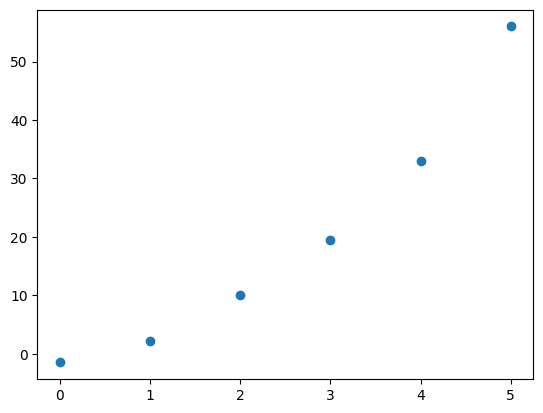

In [41]:
x = np.array(range(0,6))
y = [-1.5,2.2,10,19.5,33,56]
plt.scatter(x,y)
plt.show()

model = LpProblem("Prolozeni", LpMinimize)
eps = [LpVariable(name=f'epsilon{i}', lowBound=0) for i in range(len(x))]
betas = [LpVariable(name=f'beta{i}') for i in [0,1,2]]
model += lpSum(eps)
for i in range(len(x)):
    model += ((y[i]-(betas[0]+betas[1]*x[i]+betas[2]*x[i]**2)) <= eps[i], f"horni omezeni{i}")
    model += ((y[i]-(betas[0]+betas[1]*x[i]+betas[2]*x[i]**2)) >= -eps[i], f"dolni omezeni{i}")

In [42]:
result = model.solve()
print(f"Hotovo {result}")
print(f"Závěr: {model.status}, {LpStatus[model.status]}")
print(f"Optimum: {model.objective.value()}")
for var in model.variables():
  print(f"{var.name}: {var.value()}")
for name, constraint in model.constraints.items():
  print(f"{name}: {constraint.value()}")

Hotovo 1
Závěr: 1, Optimal
Optimum: 5.7
beta0: -1.5
beta1: 1.75
beta2: 1.95
epsilon0: 0.0
epsilon1: 0.0
epsilon2: 0.2
epsilon3: 1.8
epsilon4: 3.7
epsilon5: 0.0
horni_omezeni0: 0.0
dolni_omezeni0: 0.0
horni_omezeni1: 2.220446049250313e-16
dolni_omezeni1: 2.220446049250313e-16
horni_omezeni2: 1.6653345369377348e-16
dolni_omezeni2: 0.4000000000000002
horni_omezeni3: -3.6000000000000005
dolni_omezeni3: -6.661338147750939e-16
horni_omezeni4: -7.3999999999999995
dolni_omezeni4: 8.881784197001252e-16
horni_omezeni5: 0.0
dolni_omezeni5: 0.0
